In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Hr Analysis.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
promoted = df[df['is_promoted'] == 1]

In [5]:
attr = promoted[['employee_id', 'education', 'gender', 'age', 'department', 'region']]

In [6]:
perf = promoted[['employee_id', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'no_of_trainings']]

## Dataset General Overview

In [7]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


#### Checking Percentage of Null Values

In [9]:
(df.isna().sum() / df.shape[0]) * 100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

### Drop Duplicates

In [10]:
df.drop_duplicates()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


## Univariate Analysis

#### "department"

<AxesSubplot:xlabel='department'>

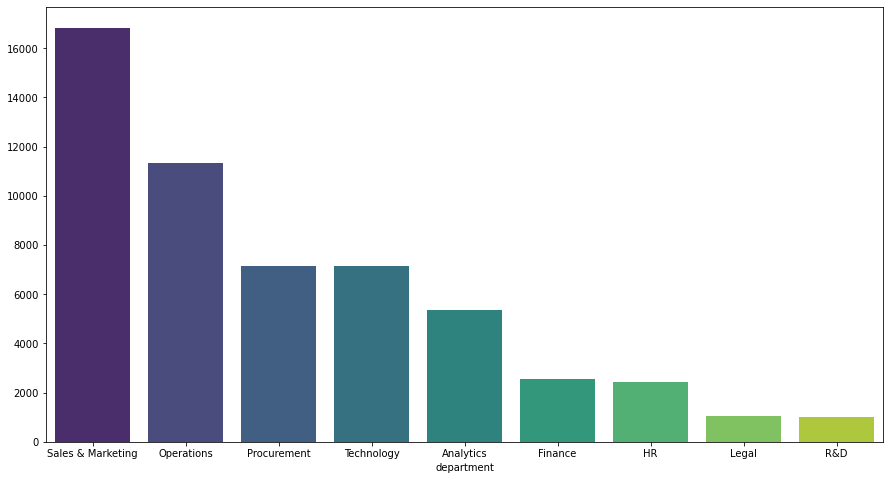

In [11]:
plt.figure(figsize=[15, 8])
department_count = (df.groupby('department').count()).employee_id.sort_values(ascending=False)
sns.barplot(x=department_count.index, y= department_count.values, palette='viridis')

#### "region"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'region_2'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'region_7'),
  Text(3, 0, 'region_15'),
  Text(4, 0, 'region_13'),
  Text(5, 0, 'region_26'),
  Text(6, 0, 'region_31'),
  Text(7, 0, 'region_4'),
  Text(8, 0, 'region_27'),
  Text(9, 0, 'region_16'),
  Text(10, 0, 'region_28'),
  Text(11, 0, 'region_11'),
  Text(12, 0, 'region_23'),
  Text(13, 0, 'region_29'),
  Text(14, 0, 'region_32'),
  Text(15, 0, 'region_19'),
  Text(16, 0, 'region_20'),
  Text(17, 0, 'region_14'),
  Text(18, 0, 'region_25'),
  Text(19, 0, 'region_17'),
  Text(20, 0, 'region_5'),
  Text(21, 0, 'region_6'),
  Text(22, 0, 'region_30'),
  Text(23, 0, 'region_8'),
  Text(24, 0, 'region_10'),
  Text(25, 0, 'region_1'),
  Text(26, 0, 'region_24'),
  Text(27, 0, 'region_12'),
  Text(28, 0, 'region_9'),
  Text(29, 0, 'region_21'),
  Text(30, 0, 'region_3'

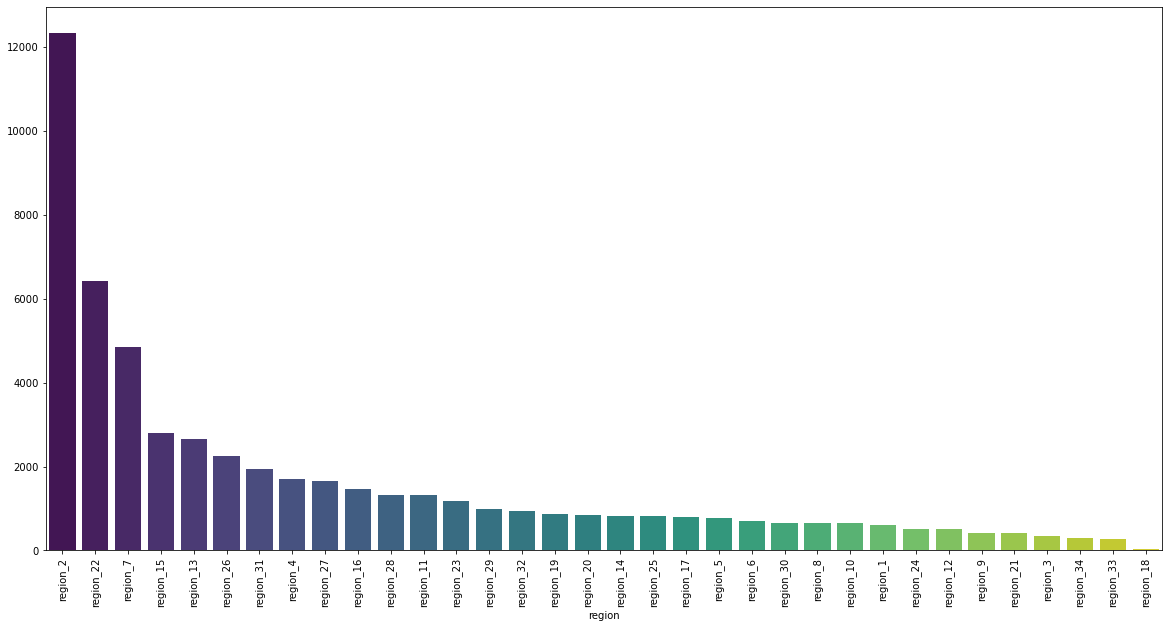

In [12]:
plt.figure(figsize=[20, 10])
region_count = (df.groupby('region').count()).employee_id.sort_values(ascending=False)
sns.barplot(x=region_count.index, y= region_count.values, palette='viridis')
plt.xticks(rotation = 90)

#### "education"

<AxesSubplot:xlabel='education', ylabel='count'>

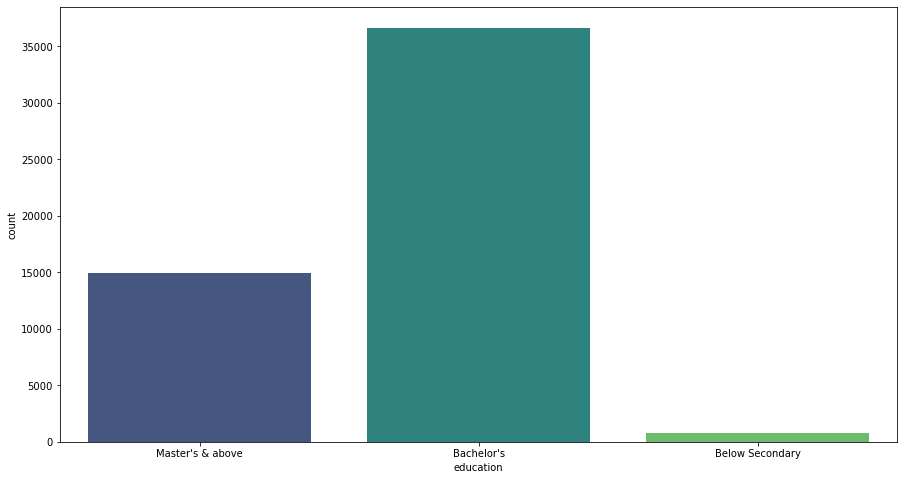

In [13]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.education, palette='viridis')

#### "gender"

<AxesSubplot:xlabel='gender', ylabel='count'>

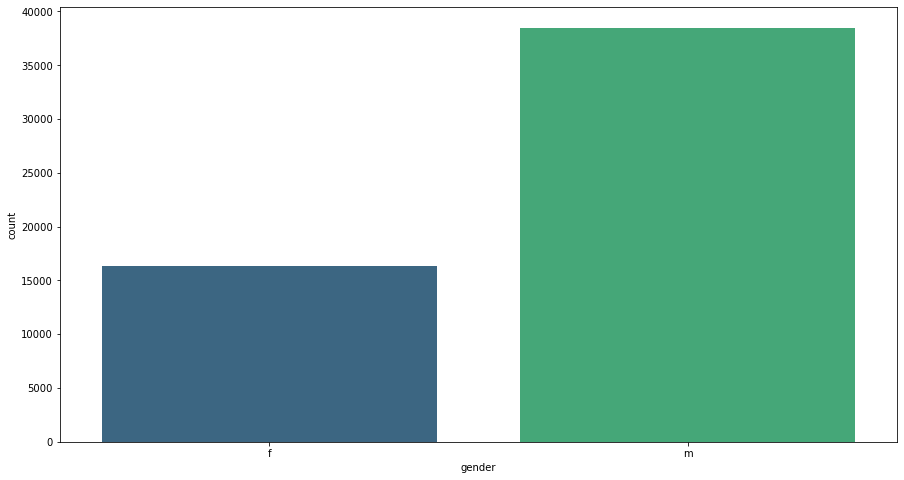

In [14]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.gender, palette='viridis')

#### "recruitment_channel"

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

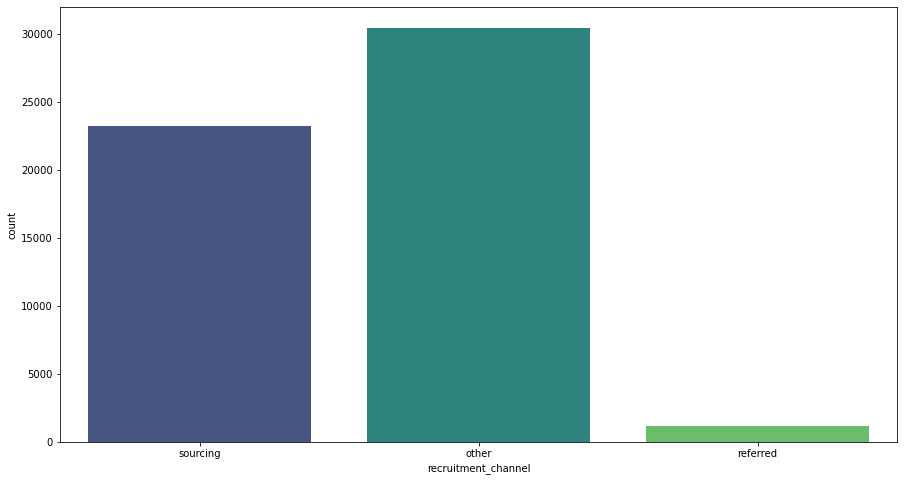

In [15]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.recruitment_channel, palette='viridis')

#### "no_of_trainings"

<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

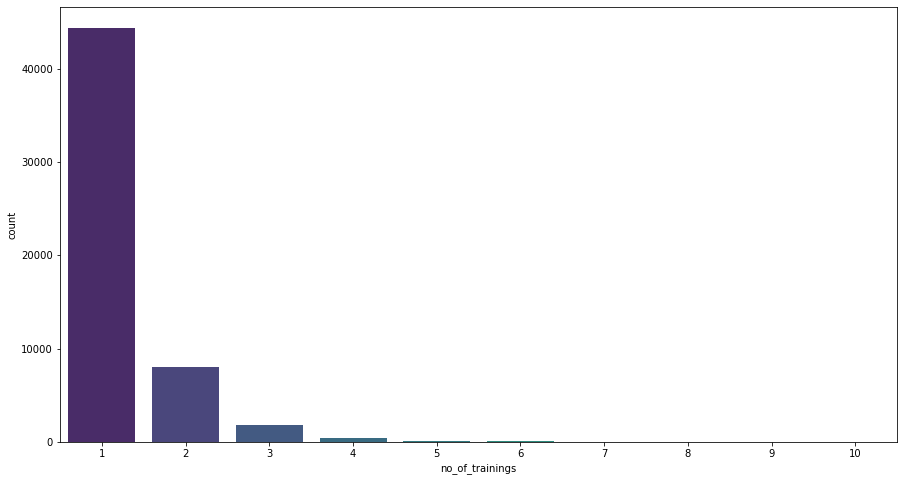

In [16]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.no_of_trainings, palette='viridis')

#### "age"

<AxesSubplot:xlabel='age', ylabel='Density'>

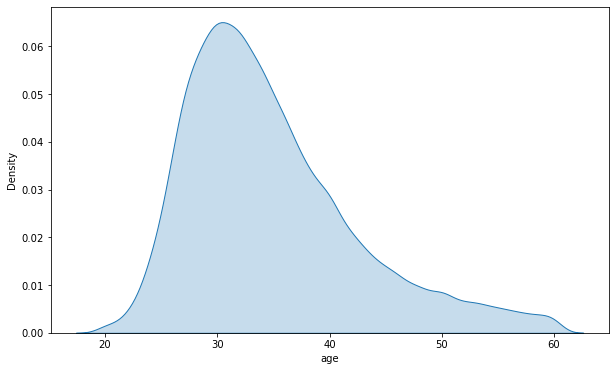

In [17]:
plt.figure(figsize=[10, 6])
sns.kdeplot(x=df.age, shade=True)

#### "previous_year_rating"

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

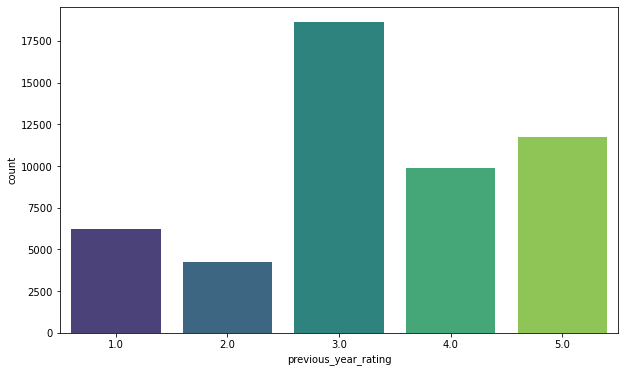

In [18]:
plt.figure(figsize=[10, 6])
sns.countplot(x=df.previous_year_rating, palette='viridis')

#### "length_of_service"

<AxesSubplot:xlabel='length_of_service', ylabel='count'>

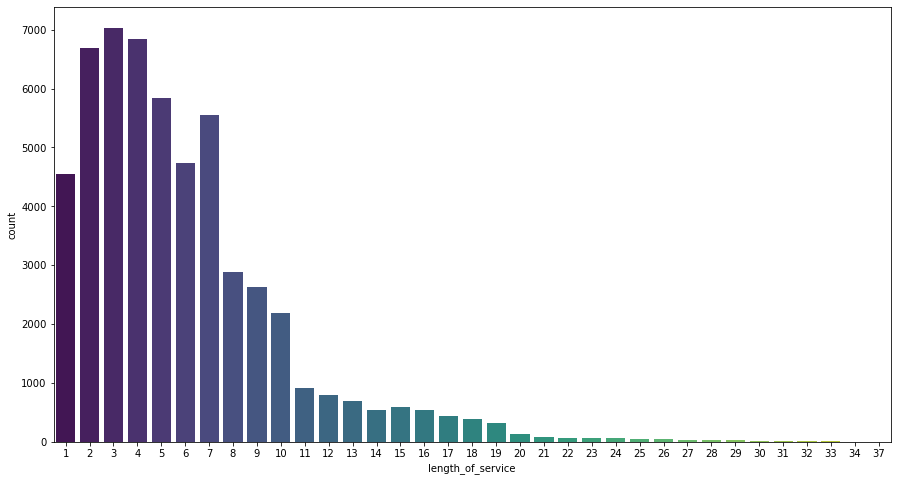

In [19]:
plt.figure(figsize=[15, 8])
service_count = (df.groupby('length_of_service').count()).employee_id.sort_values(ascending=False)
sns.countplot(x= df.length_of_service, palette='viridis')

#### "KPIs_met >80%"

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

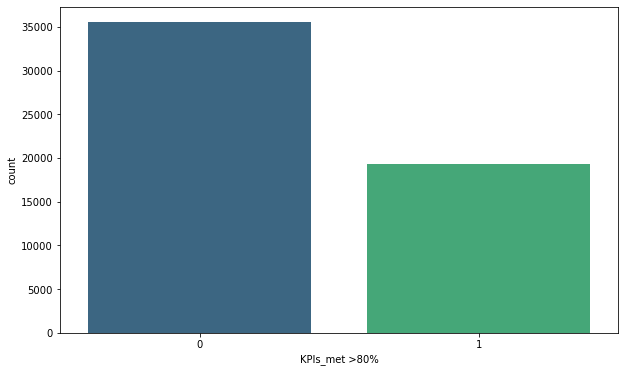

In [20]:
plt.figure(figsize=[10, 6])
sns.countplot(x=df['KPIs_met >80%'], palette='viridis')

#### "awards_won?"

<AxesSubplot:xlabel='awards_won?', ylabel='count'>

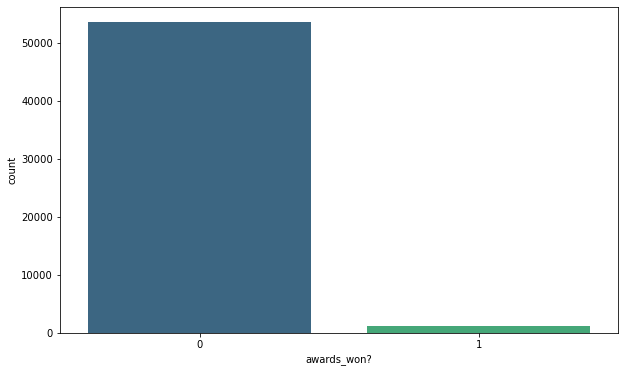

In [21]:
plt.figure(figsize=[10, 6])
sns.countplot(x=df['awards_won?'], palette='viridis')

#### "avg_training_score"

<AxesSubplot:xlabel='avg_training_score', ylabel='Count'>

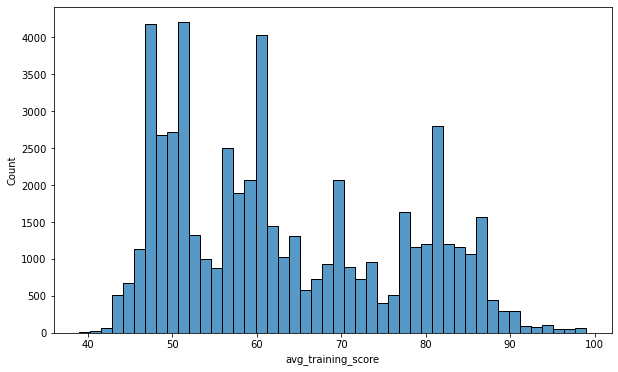

In [22]:
plt.figure(figsize=[10, 6])
sns.histplot(x=df['avg_training_score'], palette='viridis')

#### "is_promoted"

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

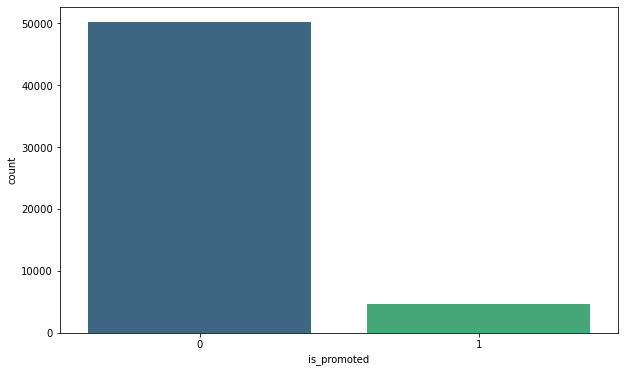

In [23]:
plt.figure(figsize=[10, 6])
sns.countplot(x=df.is_promoted, palette='viridis')

### Feature engineering for "length_of_service"

In [24]:
def title(x):

    if x <= 3:

        return 'Entry-Level'

    elif x >=4 and x < 7:
        
        return 'Mid-Level'

    else:

        return 'Experienced-Level'

In [25]:
df['seniority_level'] = df.length_of_service.apply(title)

#### "seniority_level" uni analysis

<AxesSubplot:xlabel='seniority_level', ylabel='count'>

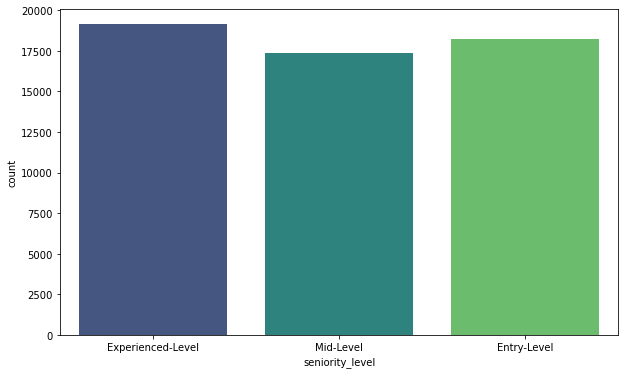

In [26]:
plt.figure(figsize=[10, 6])
sns.countplot(x=df.seniority_level, palette='viridis')

## Bivariate Analysis

#### Heatmap

<AxesSubplot:>

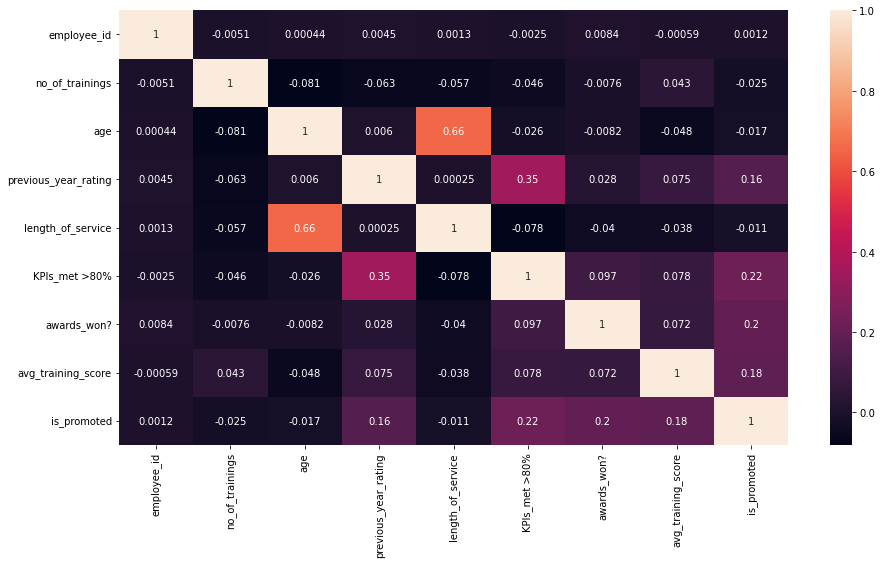

In [27]:
plt.figure(figsize=[15, 8])
sns.heatmap(df.corr(), annot=True)

#### KPI Vs previous_year_rating

Text(0.5, 1.0, 'KPI Vs Previous year rating')

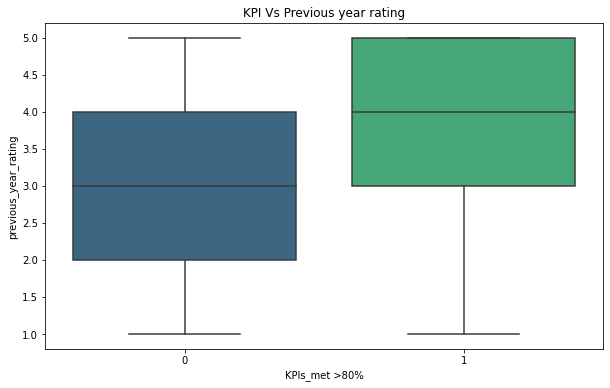

In [28]:
plt.figure(figsize=[10, 6])
sns.boxplot(x= df['KPIs_met >80%'], y= df.previous_year_rating, palette='viridis')
plt.title('KPI Vs Previous year rating')

#### Gender in each department

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='count'>

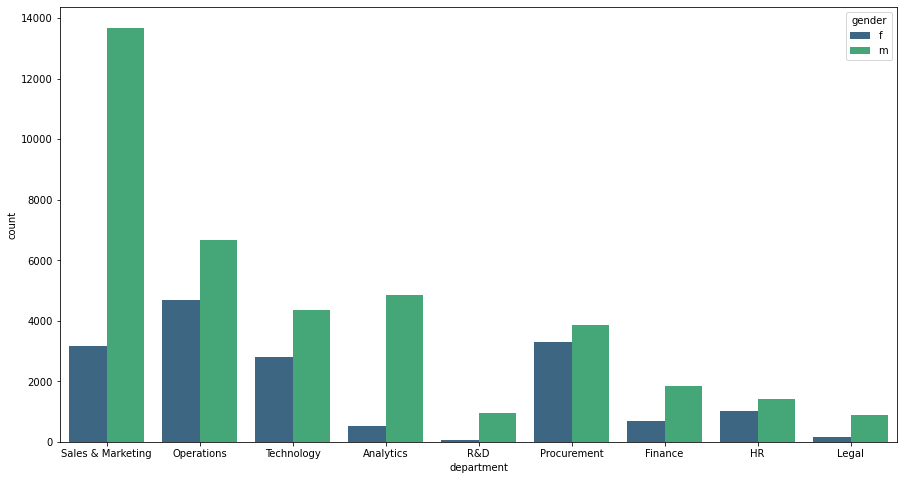

In [29]:
plt.figure(figsize=[15, 8])
sns.countplot(df.department, hue=df.gender, palette='viridis')

#### no of trainings for diferent seniority levels

<AxesSubplot:xlabel='seniority_level', ylabel='no_of_trainings'>

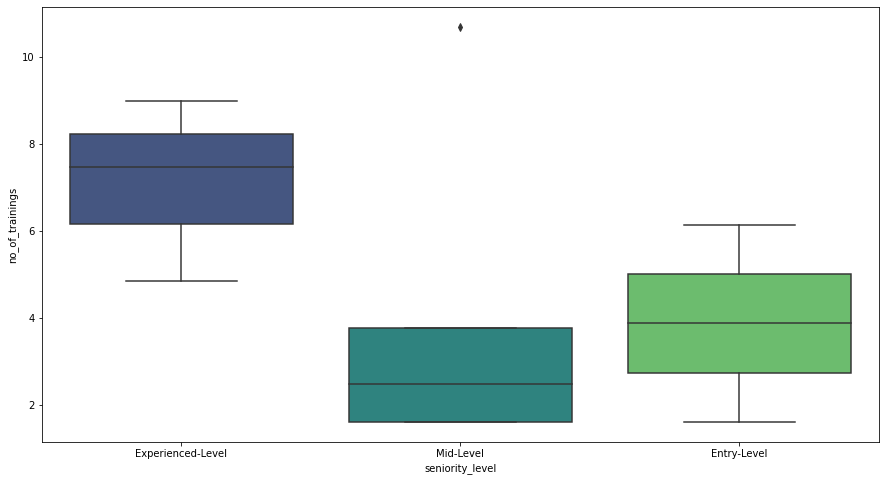

In [30]:
plt.figure(figsize=[15, 8])
sns.boxplot(x=df.seniority_level , y= np.log(df.no_of_trainings.value_counts()), palette='viridis')

#### Recruitment channel in each department

<AxesSubplot:xlabel='department', ylabel='count'>

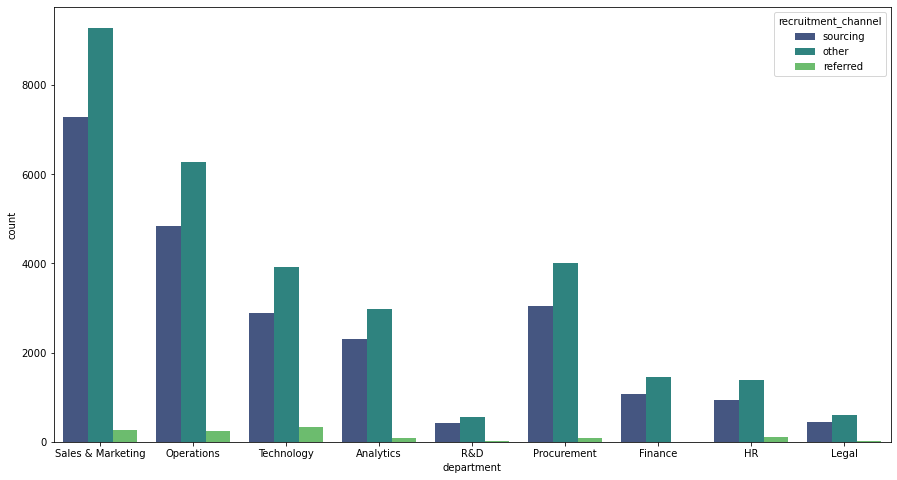

In [31]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.department, hue=df.recruitment_channel, palette='viridis')

#### KPI achieved by each gender

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

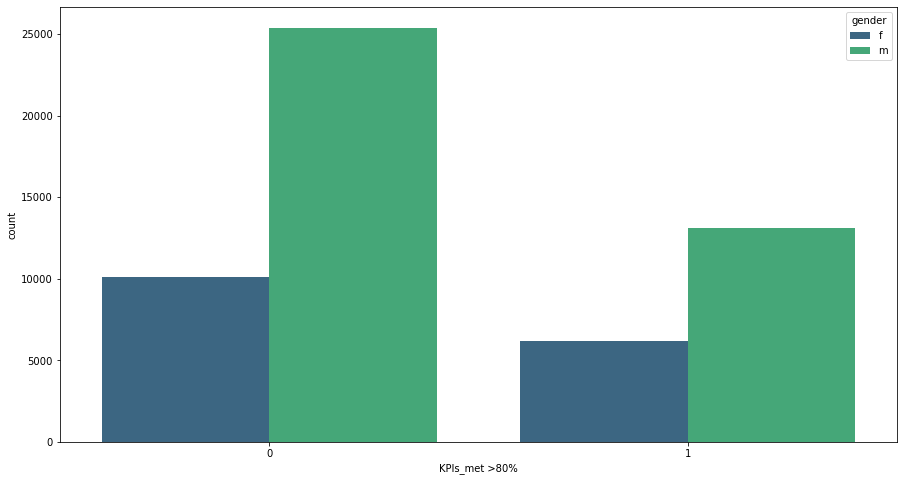

In [32]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df['KPIs_met >80%'], hue=df.gender, palette='viridis')

#### Seniority level for each gender

<AxesSubplot:xlabel='seniority_level', ylabel='count'>

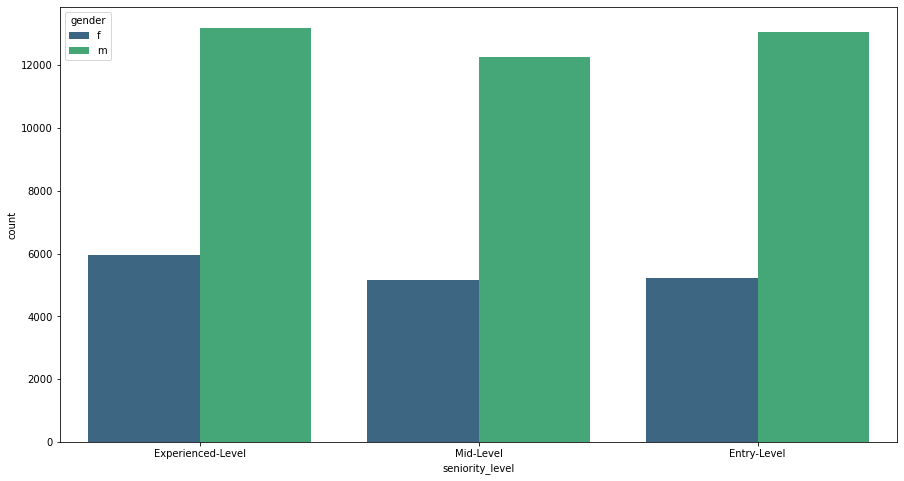

In [33]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.seniority_level, hue=df.gender, palette='viridis')

#### Educational degree for each seniority level

<AxesSubplot:xlabel='seniority_level', ylabel='count'>

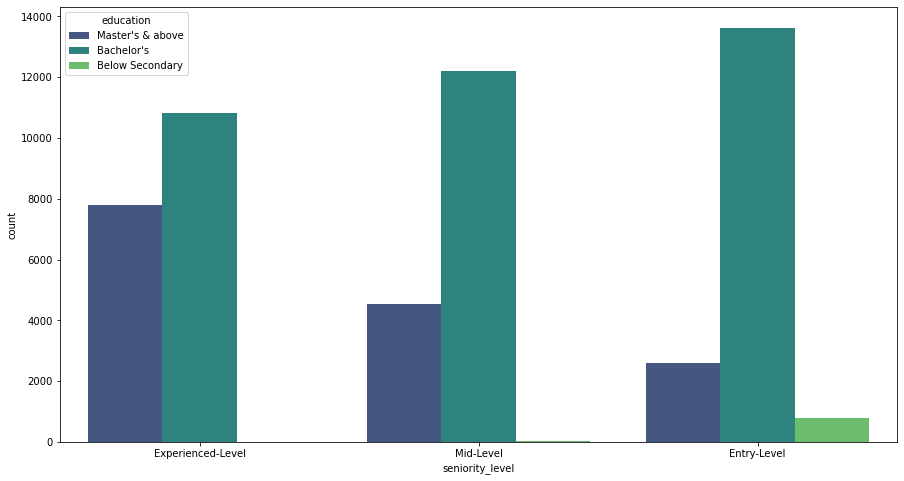

In [34]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.seniority_level, hue=df.education, palette='viridis')

## Analysis Questions ?

### 1) Which department has the highest number of promoted employees ?

<AxesSubplot:xlabel='department'>

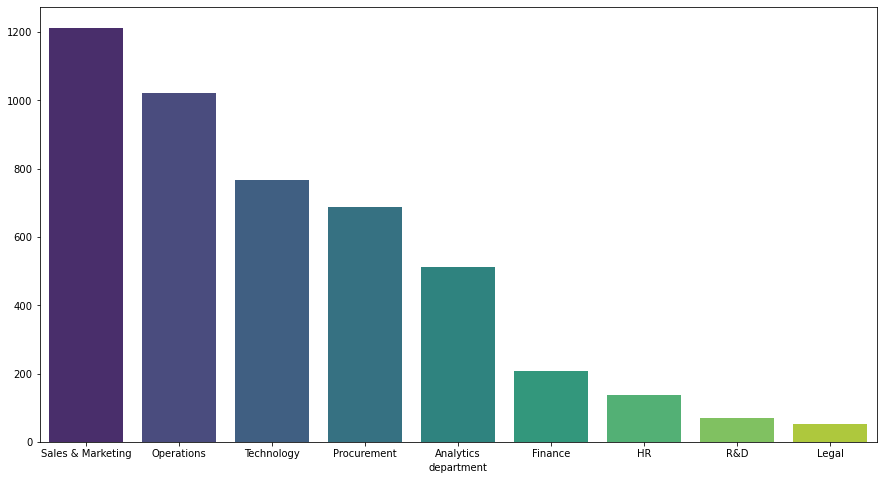

In [35]:
plt.figure(figsize=[15, 8])
prom_dept = promoted.groupby('department').count().employee_id.sort_values(ascending=False)
sns.barplot(x= prom_dept.index, y= prom_dept.values, palette='viridis')

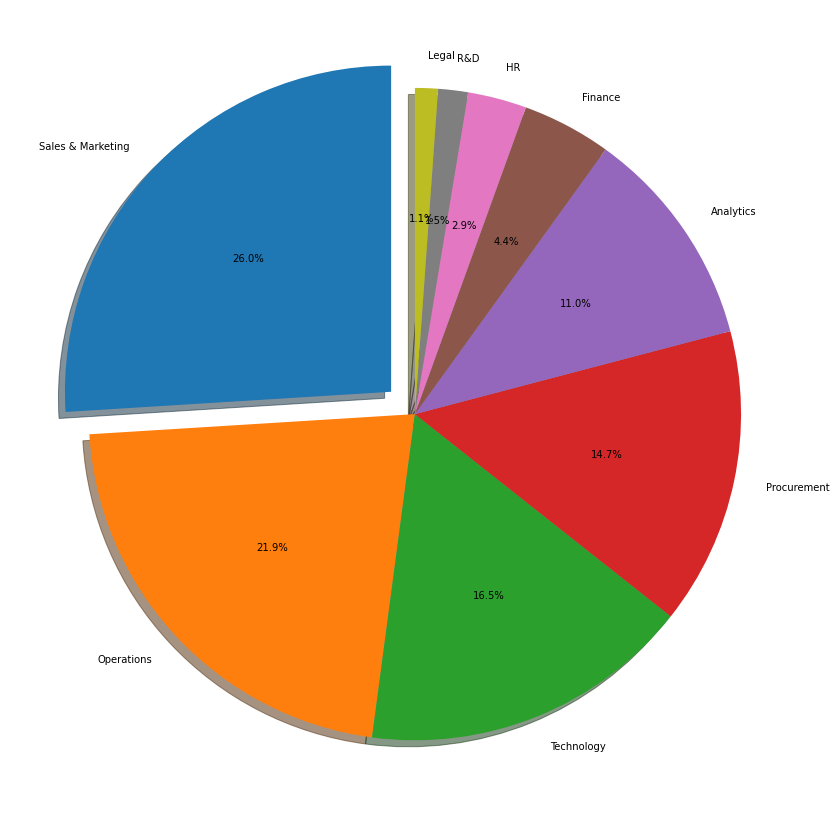

In [69]:
plt.figure(figsize=[15, 15])
plt.pie(prom_dept.values, explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0), labels= prom_dept.index, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

### 2) Top 10 regions that have promoted employees ?

<AxesSubplot:xlabel='region'>

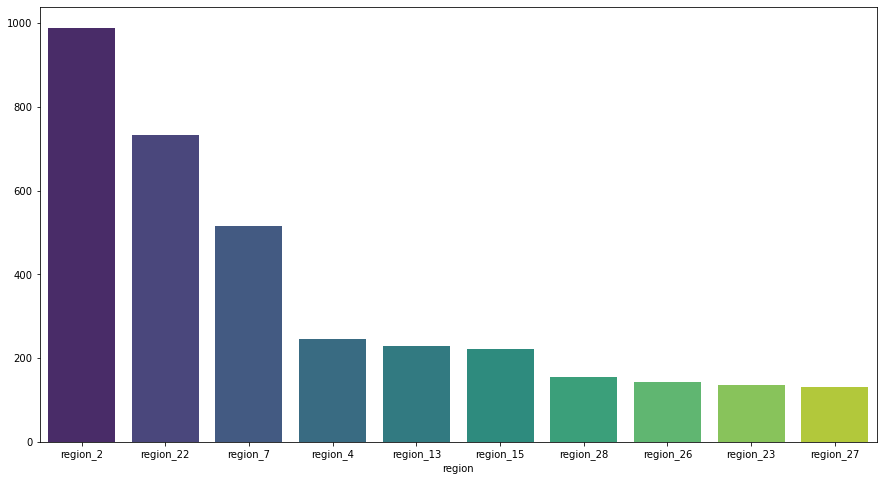

In [36]:
plt.figure(figsize=[15, 8])
reg_dept = promoted.groupby('region').count().employee_id.sort_values(ascending=False)[:10]
sns.barplot(x= reg_dept.index, y= reg_dept.values, palette='viridis')

#### 3) Does educational degree increase the chance of getting a promotion ?

<AxesSubplot:xlabel='education', ylabel='count'>

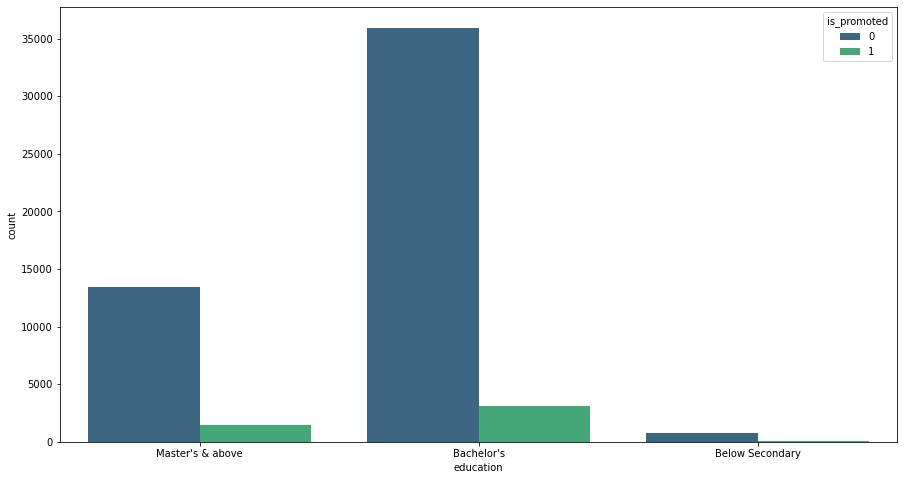

In [114]:
plt.figure(figsize=[15, 8])
sns.countplot(x= df.education, hue=df.is_promoted, palette='viridis')

#### 4) Which recruitment channel provides highest number of promoted employees ?

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

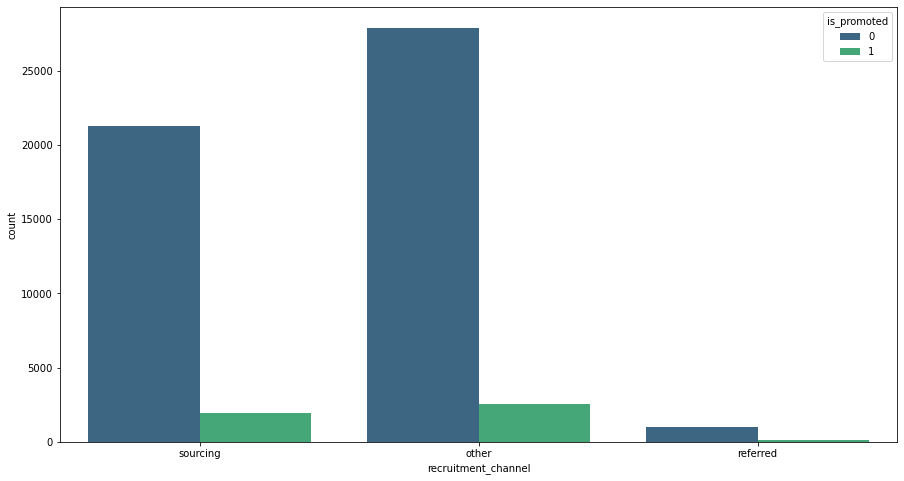

In [40]:
plt.figure(figsize=[15, 8])
sns.countplot(x = df.recruitment_channel, hue = df.is_promoted, palette='viridis')

#### 5) How number of trainings affects getting promoted ?

<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

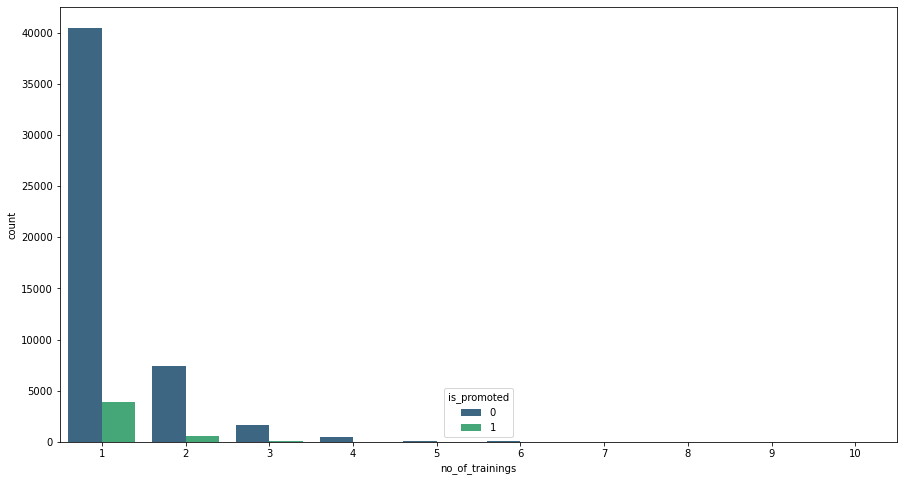

In [116]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.no_of_trainings, hue=df.is_promoted, palette='viridis')

#### 6) How average training score affects getting promoted ?

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

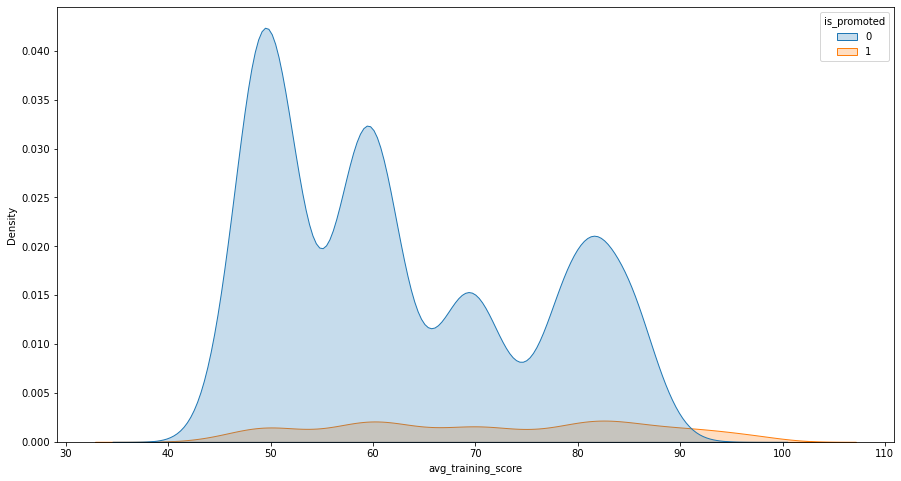

In [85]:
plt.figure(figsize=[15, 8])
sns.kdeplot(x=df.avg_training_score, hue=df.is_promoted, shade=True)

#### 7) How age affects chance of getting promoted ?

<AxesSubplot:xlabel='age', ylabel='Density'>

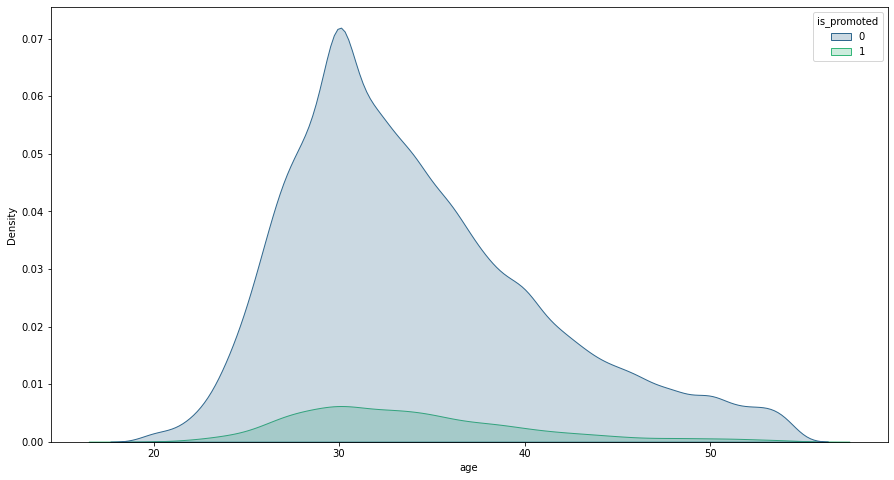

In [112]:
plt.figure(figsize=[15, 8])
sns.kdeplot(x= df.age, hue=df.is_promoted, palette='viridis', shade=True)

#### 8) How Gender affects getting promoted ?

<AxesSubplot:xlabel='gender', ylabel='count'>

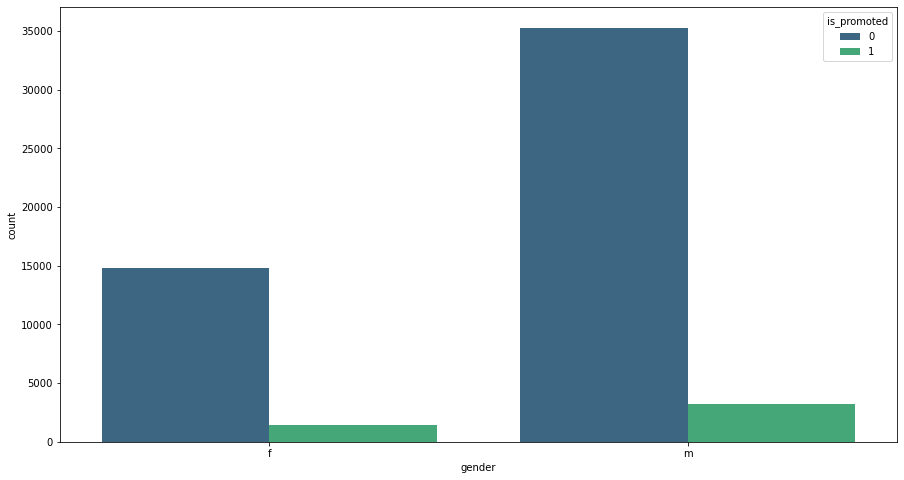

In [111]:
plt.figure(figsize=[15, 8])
sns.countplot(x= df.gender, hue=df.is_promoted, palette='viridis')

#### 9) Impact of previous year rating on getting promoted ?

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

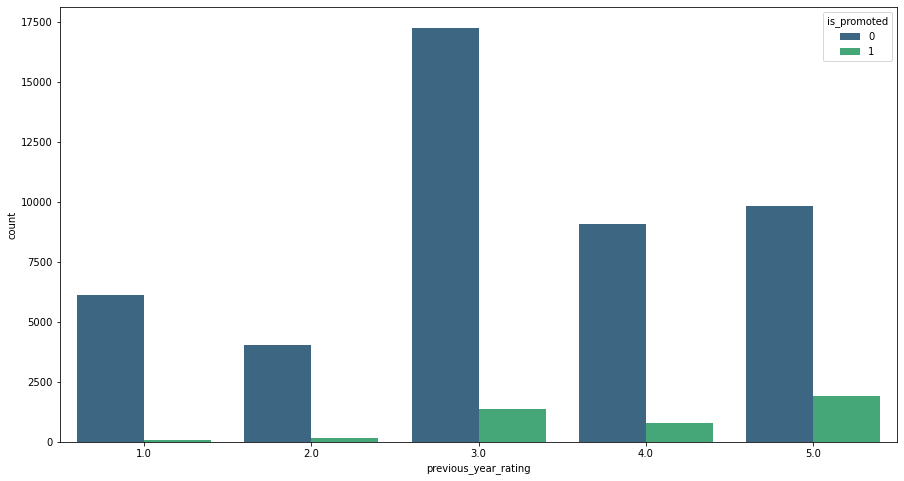

In [87]:
plt.figure(figsize=[15, 8])
sns.countplot(x= df.previous_year_rating, hue=df.is_promoted, palette='viridis')

#### 10) Percentage of promoted employees who achieved KPI'S Vs promoted employees who didn't achieve ?

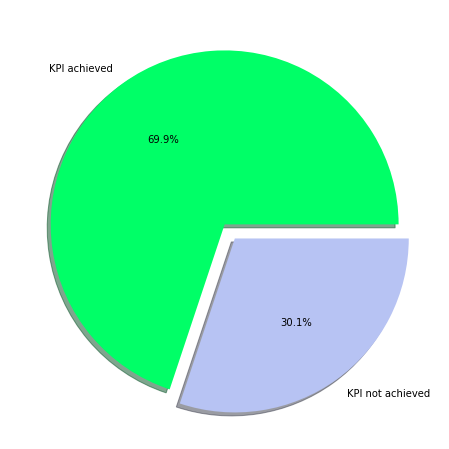

In [41]:
plt.figure(figsize=[15,8])
prom_KPI = promoted.groupby('KPIs_met >80%').count().employee_id.sort_values(ascending=False)
plt.pie(prom_KPI.values, explode=(0, 0.1), labels= ['KPI achieved "Promoted" ', 'KPI not achieved'], autopct='%1.1f%%',shadow=True, colors= ('#00ff67', '#B7C3F3'))
plt.show()

#### 11) How winning an award affects the chance of getting promoted ?

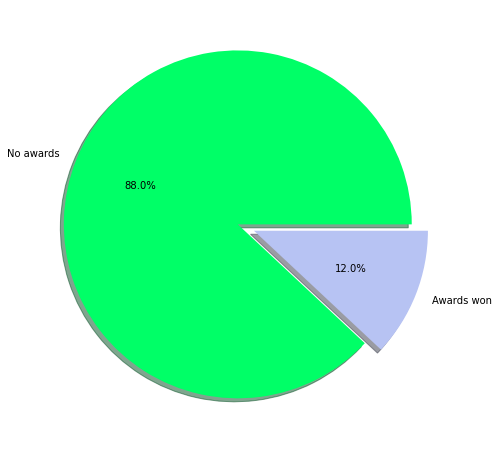

In [42]:
plt.figure(figsize=[15,8])
prom_award = promoted.groupby('awards_won?').count().employee_id.sort_values(ascending=False)
plt.pie(prom_award.values, explode=(0, 0.1), labels= ['No awards', 'Awards won'], autopct='%1.1f%%',shadow=True, colors= ('#00ff67', '#B7C3F3'))
plt.show()

#### 11) Which seniority level has the highest number of promoted employees ?

<AxesSubplot:xlabel='seniority_level', ylabel='count'>

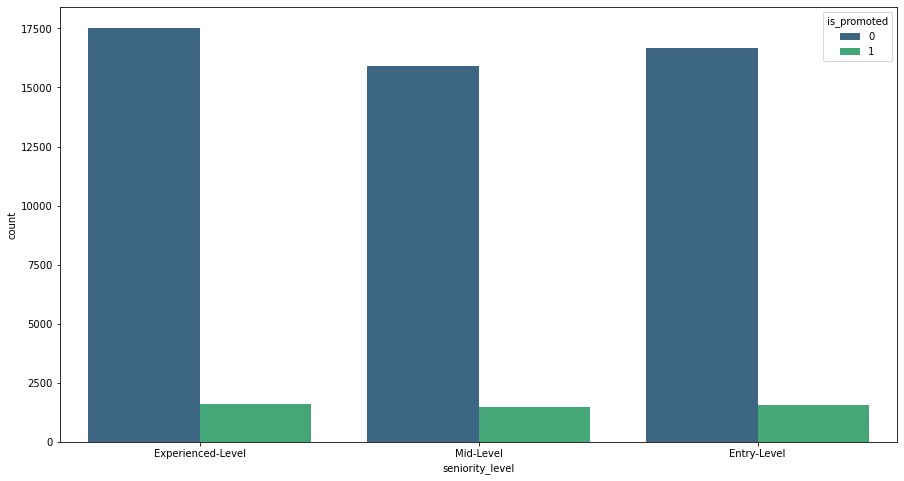

In [43]:
plt.figure(figsize=[15, 8])
sns.countplot(x= df.seniority_level, hue=df.is_promoted, palette='viridis')

# Dealing with Missing Values

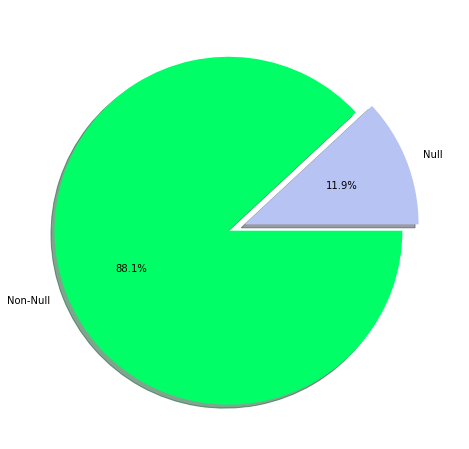

In [56]:
plt.figure(figsize=[30,8])
missing = [6533, 48275]
plt.pie(missing, explode=(0, 0.1), labels= ['Null', 'Non-Null'], autopct='%1.1f%%',shadow=True, colors= ('#B7C3F3', '#00ff67'))
plt.show()

#### Filling missing values by the 'mode'

In [46]:
df.education.fillna(df.education.mode()[0], inplace=True)
df.previous_year_rating.fillna(df.previous_year_rating.mode()[0], inplace=True)

# Handling Outliers

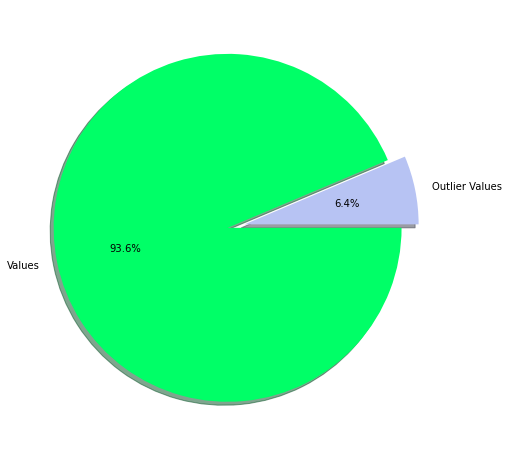

In [57]:
plt.figure(figsize=[30,8])
outlier = [3489, 51319]
plt.pie(outlier, explode=(0, 0.1), labels= ['Outlier Values', 'Values'], autopct='%1.1f%%',shadow=True, colors= ('#B7C3F3', '#00ff67'))
plt.show()

#### Visualize the outliers

<AxesSubplot:xlabel='age'>

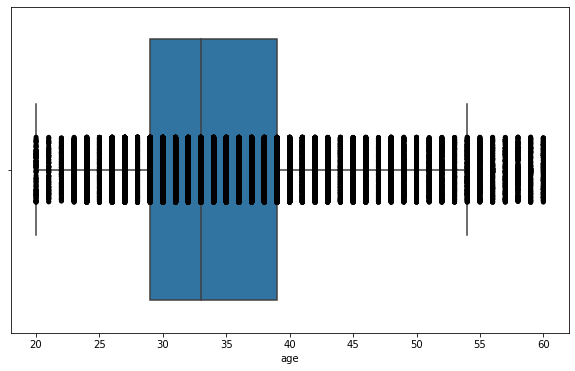

In [48]:
plt.figure(figsize=[10, 6])
sns.boxplot(x = df.age)
sns.stripplot(x = df.age, color='black')

<AxesSubplot:xlabel='length_of_service'>

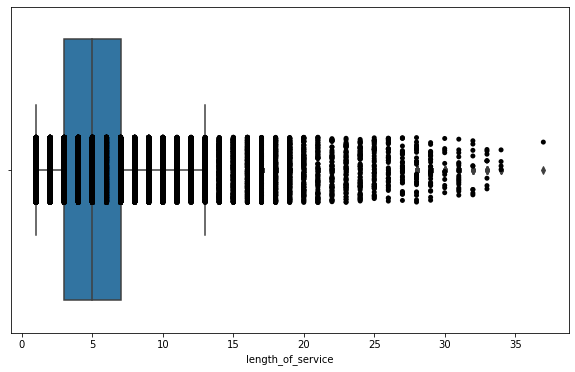

In [49]:
plt.figure(figsize=[10, 6])
sns.boxplot(x = df.length_of_service)
sns.stripplot(x = df.length_of_service, color='black')

#### Import datasist library

In [50]:
from datasist.structdata import detect_outliers

#### Replace outliers by the 'mode'

In [51]:
for c in ['age', 'length_of_service']:

    outliers_indeces = detect_outliers(df, 0, [c])

    mode = df[c].mode()[0]

    df[c].iloc[outliers_indeces] = mode

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13476\3298836472.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c].iloc[outliers_indeces] = mode
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13476\3298836472.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c].iloc[outliers_indeces] = mode


## Split input features and target variable

In [52]:
X = df.drop('is_promoted', axis=1)
y = df.is_promoted

## Dealing with Categorical data

In [53]:
X = pd.get_dummies(X, drop_first=True)
X

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,seniority_level_Experienced-Level,seniority_level_Mid-Level
0,65438,1,35,5.0,8,1,0,49,0,0,...,1,0,0,0,1,0,0,1,1,0
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,1,0,0,0,1
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,1,0,1,1,0
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,1,0,0,1,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,3,0,0,78,0,0,...,0,0,0,0,0,1,0,1,1,0
54804,74592,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,1,0,0,0,0,1
54805,13918,1,27,5.0,3,1,0,79,0,0,...,0,0,0,0,0,1,0,0,0,0
54806,13614,1,29,1.0,2,0,0,45,0,0,...,0,0,1,0,0,1,0,1,0,0


## Split data into Train and Test

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Handle imbalanced data

#### Check percentage of target variable classes

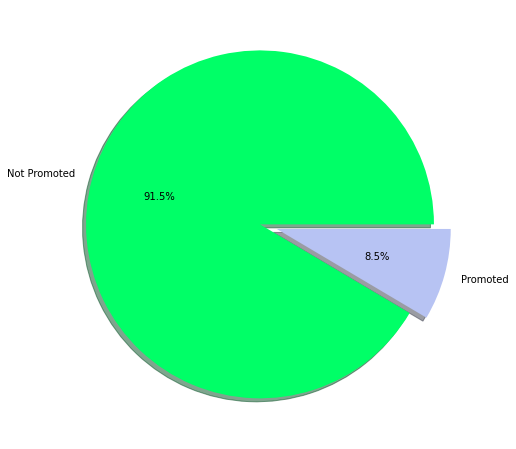

In [55]:
plt.figure(figsize=[30,8])
imb_check = (df.is_promoted.value_counts() / df.shape[0] * 100)
plt.pie(imb_check.values, explode=(0, 0.1), labels= ['Not Promoted', 'Promoted'], autopct='%1.1f%%',shadow=True, colors= ('#00ff67', '#B7C3F3'))
plt.show()

In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

## Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)

In [60]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = scaler.get_feature_names_out())
x_train_scaled

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,seniority_level_Experienced-Level,seniority_level_Mid-Level
0,1.341288,-0.336796,3.328827,-0.529048,-0.664044,-0.840748,-0.135577,-0.357208,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,-1.213011,-0.109761,1.480233,1.750144,-0.529150
1,-0.993157,-0.336796,0.866238,1.272575,1.989957,1.189417,-0.135577,0.242223,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,2.065792,-1.213011,-0.109761,1.480233,1.750144,-0.529150
2,1.708635,-0.336796,0.373721,-0.529048,-0.284901,1.189417,-0.135577,0.392081,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,-1.213011,-0.109761,-0.675569,-0.571382,1.889822
3,0.338305,-0.336796,1.030411,-0.529048,-1.043187,-0.840748,-0.135577,-1.181426,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,2.065792,0.824395,-0.109761,-0.675569,-0.571382,-0.529150
4,-0.549703,1.698084,1.194583,-0.529048,0.094242,-0.840748,-0.135577,1.141370,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,2.065792,0.824395,-0.109761,-0.675569,-0.571382,1.889822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80219,-0.996059,-0.336796,0.045375,0.986359,0.473385,-0.840748,-0.135577,-0.357208,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,-1.213011,-0.109761,1.480233,-0.571382,-0.529150
80220,-0.367898,-0.336796,-0.611315,-0.125562,0.094242,1.189417,-0.135577,-1.181426,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,-1.213011,-0.109761,1.480233,-0.571382,-0.529150
80221,-1.517556,-0.336796,0.537893,1.267781,-0.664044,-0.840748,-0.135577,-0.282279,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,-1.213011,-0.109761,-0.675569,-0.571382,-0.529150
80222,-1.016504,-0.336796,0.866238,-0.420253,-0.664044,1.189417,-0.135577,0.092366,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,0.824395,-0.109761,-0.675569,-0.571382,-0.529150


In [61]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns = scaler.get_feature_names_out())
x_test_scaled

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,seniority_level_Experienced-Level,seniority_level_Mid-Level
0,-0.319622,-0.336796,-0.447142,1.272575,0.094242,1.189417,-0.135577,-1.256355,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,0.824395,-0.109761,-0.675569,-0.571382,1.889822
1,-1.384642,-0.336796,-1.103833,-0.529048,-1.043187,-0.840748,-0.135577,-1.106497,-0.162625,-0.158293,...,4.208719,-0.081006,-0.065719,-0.09031,-0.484076,0.824395,-0.109761,-0.675569,-0.571382,-0.529150
2,1.430366,-0.336796,1.358756,-0.529048,1.610814,-0.840748,-0.135577,-1.481141,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,-1.213011,-0.109761,-0.675569,1.750144,-0.529150
3,-1.184767,-0.336796,-0.939660,-0.529048,0.473385,-0.840748,-0.135577,0.392081,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,0.824395,-0.109761,-0.675569,-0.571382,1.889822
4,0.898185,1.698084,-1.268005,-0.529048,-0.664044,-0.840748,-0.135577,0.242223,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,-1.213011,-0.109761,-0.675569,-0.571382,-0.529150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,1.164540,-0.336796,-1.103833,-2.330671,-1.043187,-0.840748,-0.135577,-1.031568,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,-1.213011,-0.109761,-0.675569,-0.571382,-0.529150
10958,-1.171928,-0.336796,-1.268005,-0.529048,-1.043187,-0.840748,-0.135577,0.242223,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,0.824395,-0.109761,1.480233,-0.571382,-0.529150
10959,0.183409,1.698084,-0.939660,1.272575,-0.284901,1.189417,-0.135577,-1.406212,-0.162625,-0.158293,...,-0.237602,-0.081006,-0.065719,-0.09031,-0.484076,-1.213011,-0.109761,1.480233,-0.571382,1.889822
10960,-1.716464,-0.336796,-0.282970,1.272575,0.473385,1.189417,-0.135577,1.216299,-0.162625,-0.158293,...,4.208719,-0.081006,-0.065719,-0.09031,-0.484076,0.824395,-0.109761,1.480233,-0.571382,1.889822
